# Challenge lycéen MathAData
## Réseau de neurones et reconnaisance d'images

!!! abstract Fonctionnement du notebook  
Ce document interactif (appelé notebook) va vous guider pour coder un **réseau de neurones appelé perceptron**. Vous pourrez d'abord compléter des fonctions en Python pour que l'algorithme fonctionne correctement, puis l'améliorer petit à petit pour essayer de vous hisser vers le haut du classement.  
!!!

!!! warning Pour retrouver votre travail déjà enregistré  
Vous avez déjà travaillé sur ce notebook et vous voulez retrouver votre travail ?  
Cliquez sur le bouton **deux petites flèches**<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">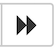</span>sur la barre d'outils en haut du notebook.  
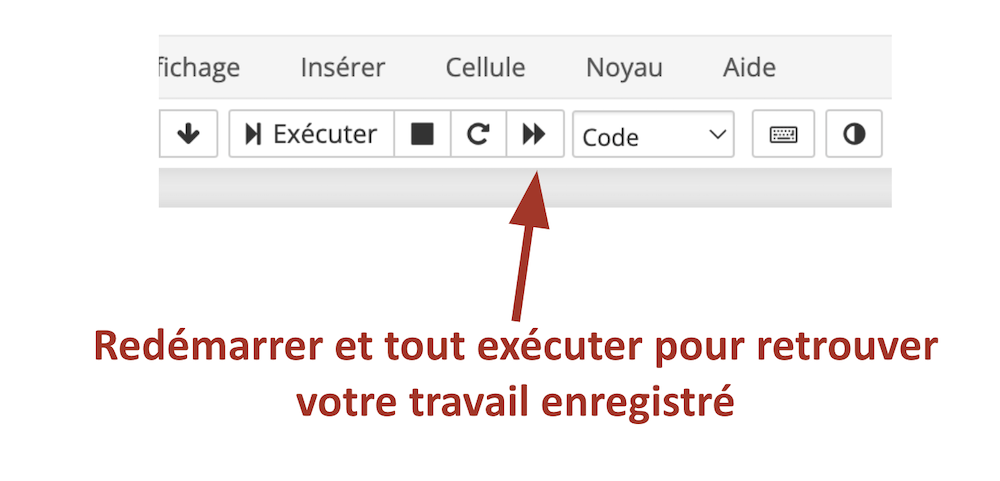  
!!!

!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">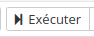</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!

In [ ]:
from utilitaires_perceptron import *
from utilitaires_mnist_papier import *

!!! tip Vérification de votre token  
Pour utiliser ce notebook, vous devez vous inscrire sur [le site mathadata](https://mathadata.fr/fr/challenge).  
Vous recevrez alors un token de soumission par mail. Remplacez les `...` dans la cellule suivante par votre token puis exécutez la cellule.  
Pour recevoir à nouveau votre token, rendez vous sur [cette page](https://mathadata.fr/challenge/renvoi_email).  
!!!

In [ ]:
token = "..."

# NE PAS TOUCHER CETTE LIGNE
validation_token()

!!! tip Base de donnée  
**Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher l'image correspondante et vous déplacer avec les flèches haut et bas du clavier.  
!!!

In [ ]:
affichage_banque()

validation_execution()

!!! question Combien de vraies images de 3 sont présentes parmi les 10 premières images ?  
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!

In [ ]:
Nombre_3 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_execution_nombre_3()

!!! question Combien d'images contient la base de données ?   
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!

In [ ]:
Nombre_total_images = ...

# NE PAS TOUCHER CETTE LIGNE
validation_execution_nombre_total()

## Point de départ

!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
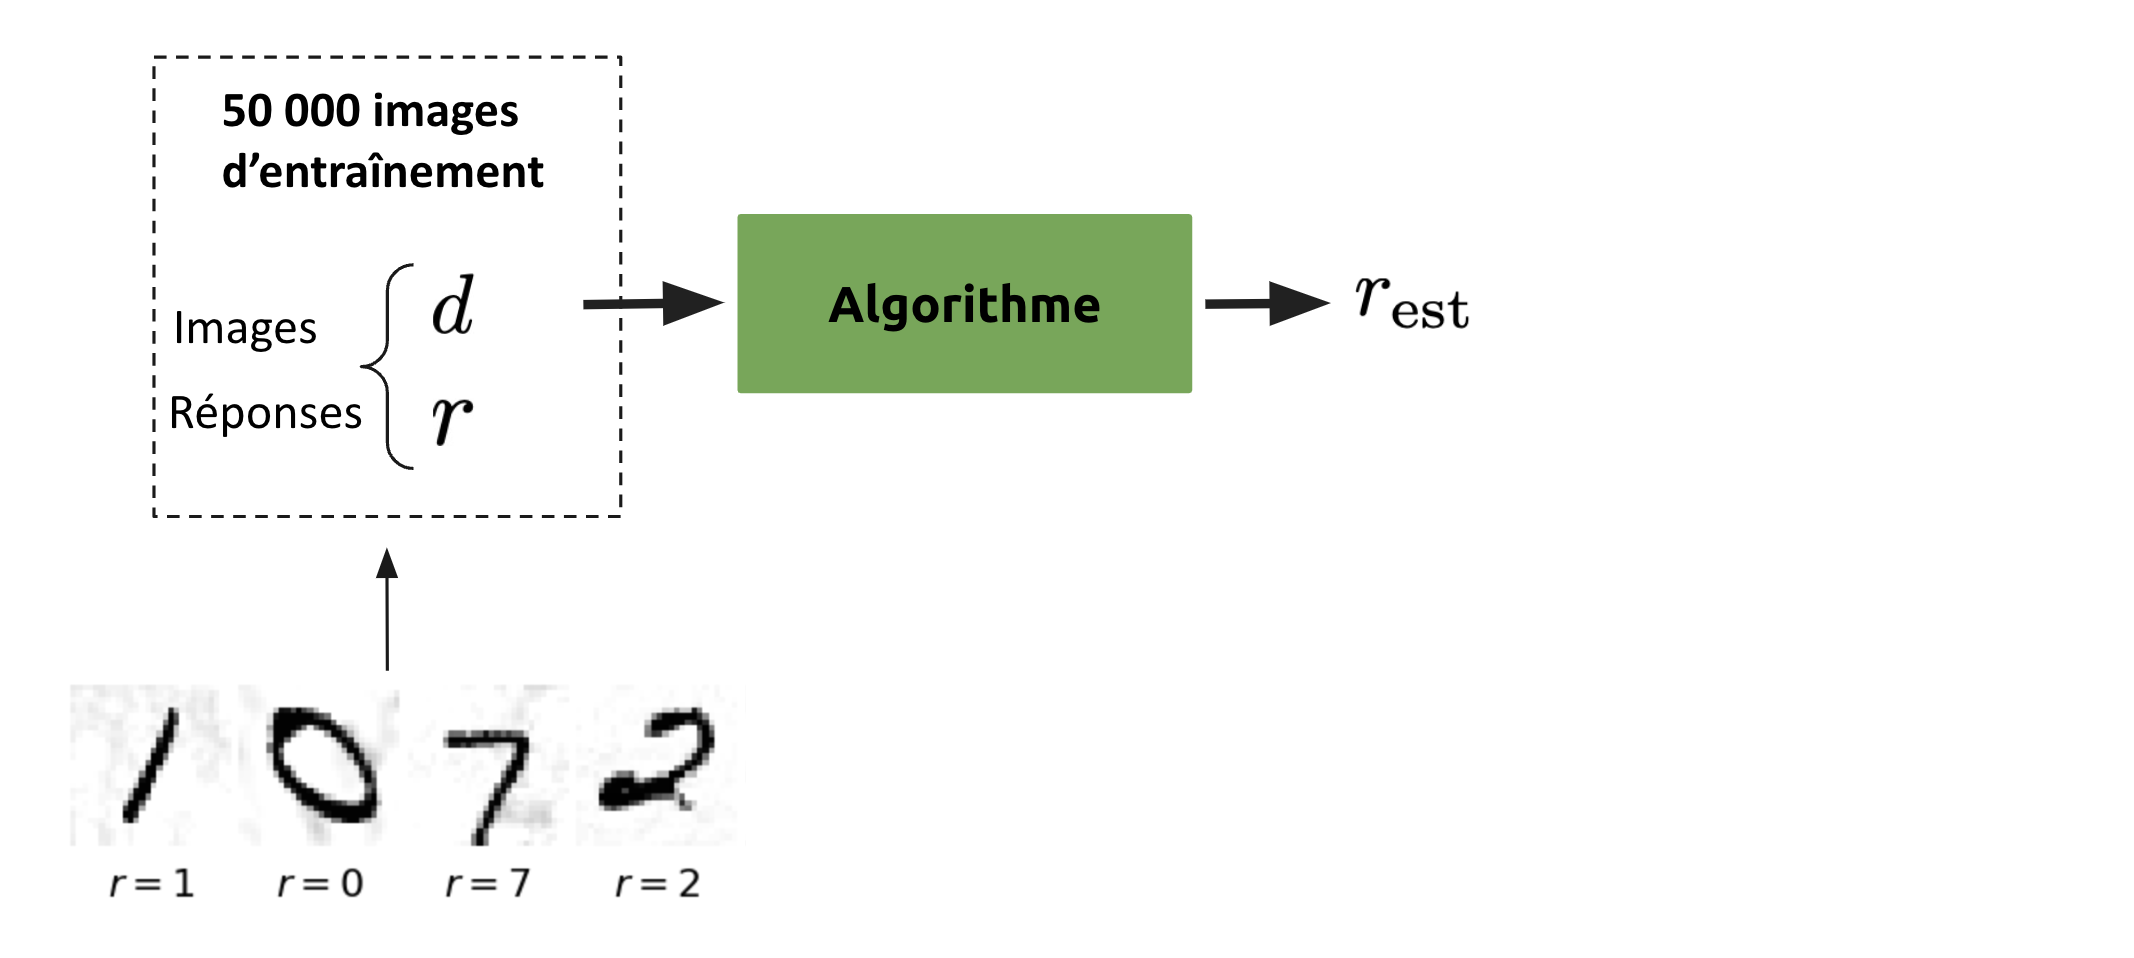  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours 0.   
Commençons par un algorithme très simple **qui renvoie toujours 0**.  
!!!

In [ ]:
import utilitaires_common

def algorithme(d):
    return 0

validation_execution_algo_fixe()

!!! question Que répond l'algorithme fainéant pour ces trois images ?  
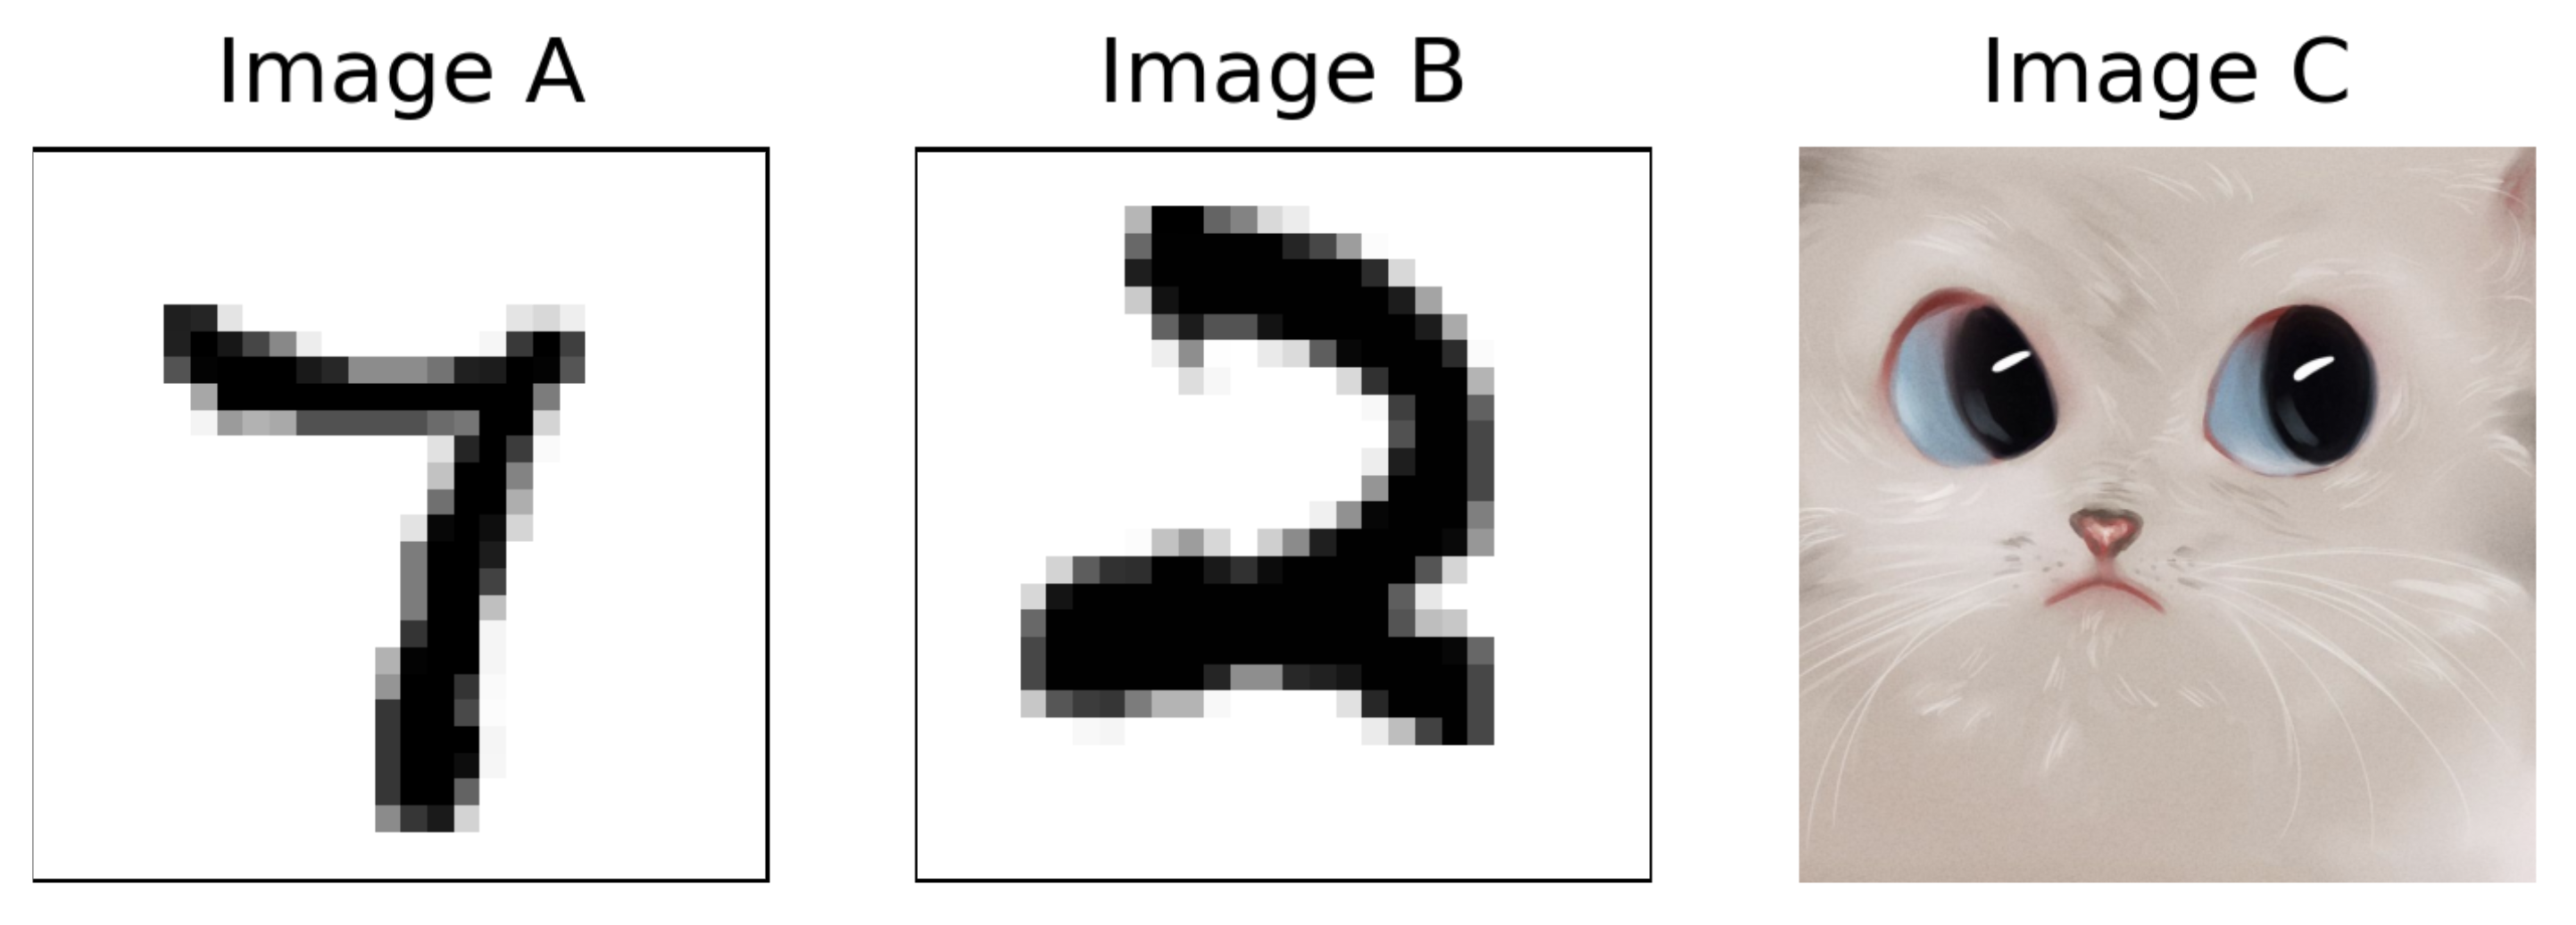  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!

In [ ]:
Reponse_Image_A = ...
Reponse_Image_B = ...
Reponse_Image_C = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Plus le pourcentage d'erreur de votre algorithme est bas meilleur est votre solution.  
  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}} \times 100$$  
Une image mal classée est une image pour laquelle l'algorithme a donné une estimation différente de la vraie classe de l'image:  
$$r_{est} \neq r$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?  
Calculez le pourcentage d'erreur de l'algorithme. **Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!

In [ ]:
erreur_10 = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_score_fixe()

!!! tip Pourcentage d'erreur d'entrainement : sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 30 000 images.  
!!!

In [ ]:
calculer_score_etape_1()

!!! tip Pourcentage d'erreur test VS entrainement  
Le pourcentage d'erreur ci-dessus est calculé sur les images de la base d'entrainement.  
Pour déterminer votre classement sur le [site](https://mathadata.fr/fr/challenge/classement), votre pourcentage d'erreur sera calculé sur des images de test, pour lesquelles vous ne connaissez pas la bonne réponse.  
!!!

## Image numérique

!!! abstract Qu'est ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
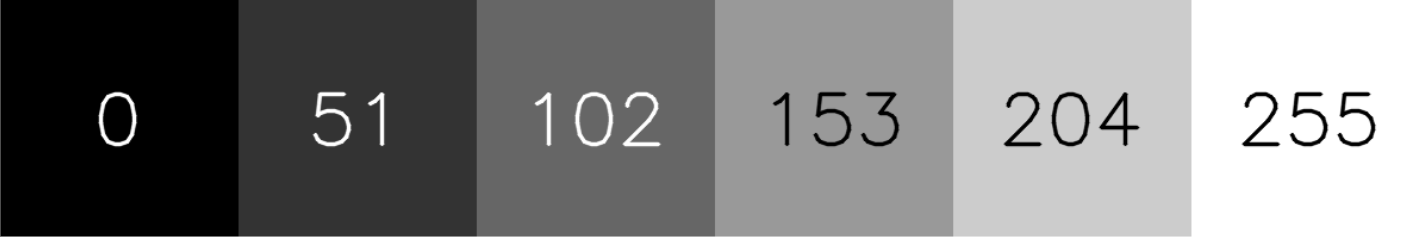  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!

In [ ]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

!!! question Quelle est la valeur du pixel (18,15) ?  
Lisez dans le tableau la valeur du pixel en position (18,15) et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
Remarque : La première coordonnée est le numéro de ligne, la deuxième le numéro de colonne : (ligne,colonne)  
!!!

In [ ]:
pixel = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_pixel()

!!! question Transformez le pixel (17,15) en pixel noir  
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!

In [ ]:
d[17,15] = ...

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

## Entrainement de l'algorithme : apprendre de ses erreurs

!!! tip Améliorer l'algorithme en apprenant de ses erreurs  
L'idée centrale d'un algorithme d'IA est de s'améliorer à partir des erreurs commises sur les données d'entrainement. Pour chaque image d'entrainement, l'algorithme va calculer une estimation puis :  
1. Si l'estimation est **correcte**, on ne change rien  
2. Si l'estimation est **fausse**, on **ajuste** l'algorithme pour que l'estimation soit correcte la prochaine fois  
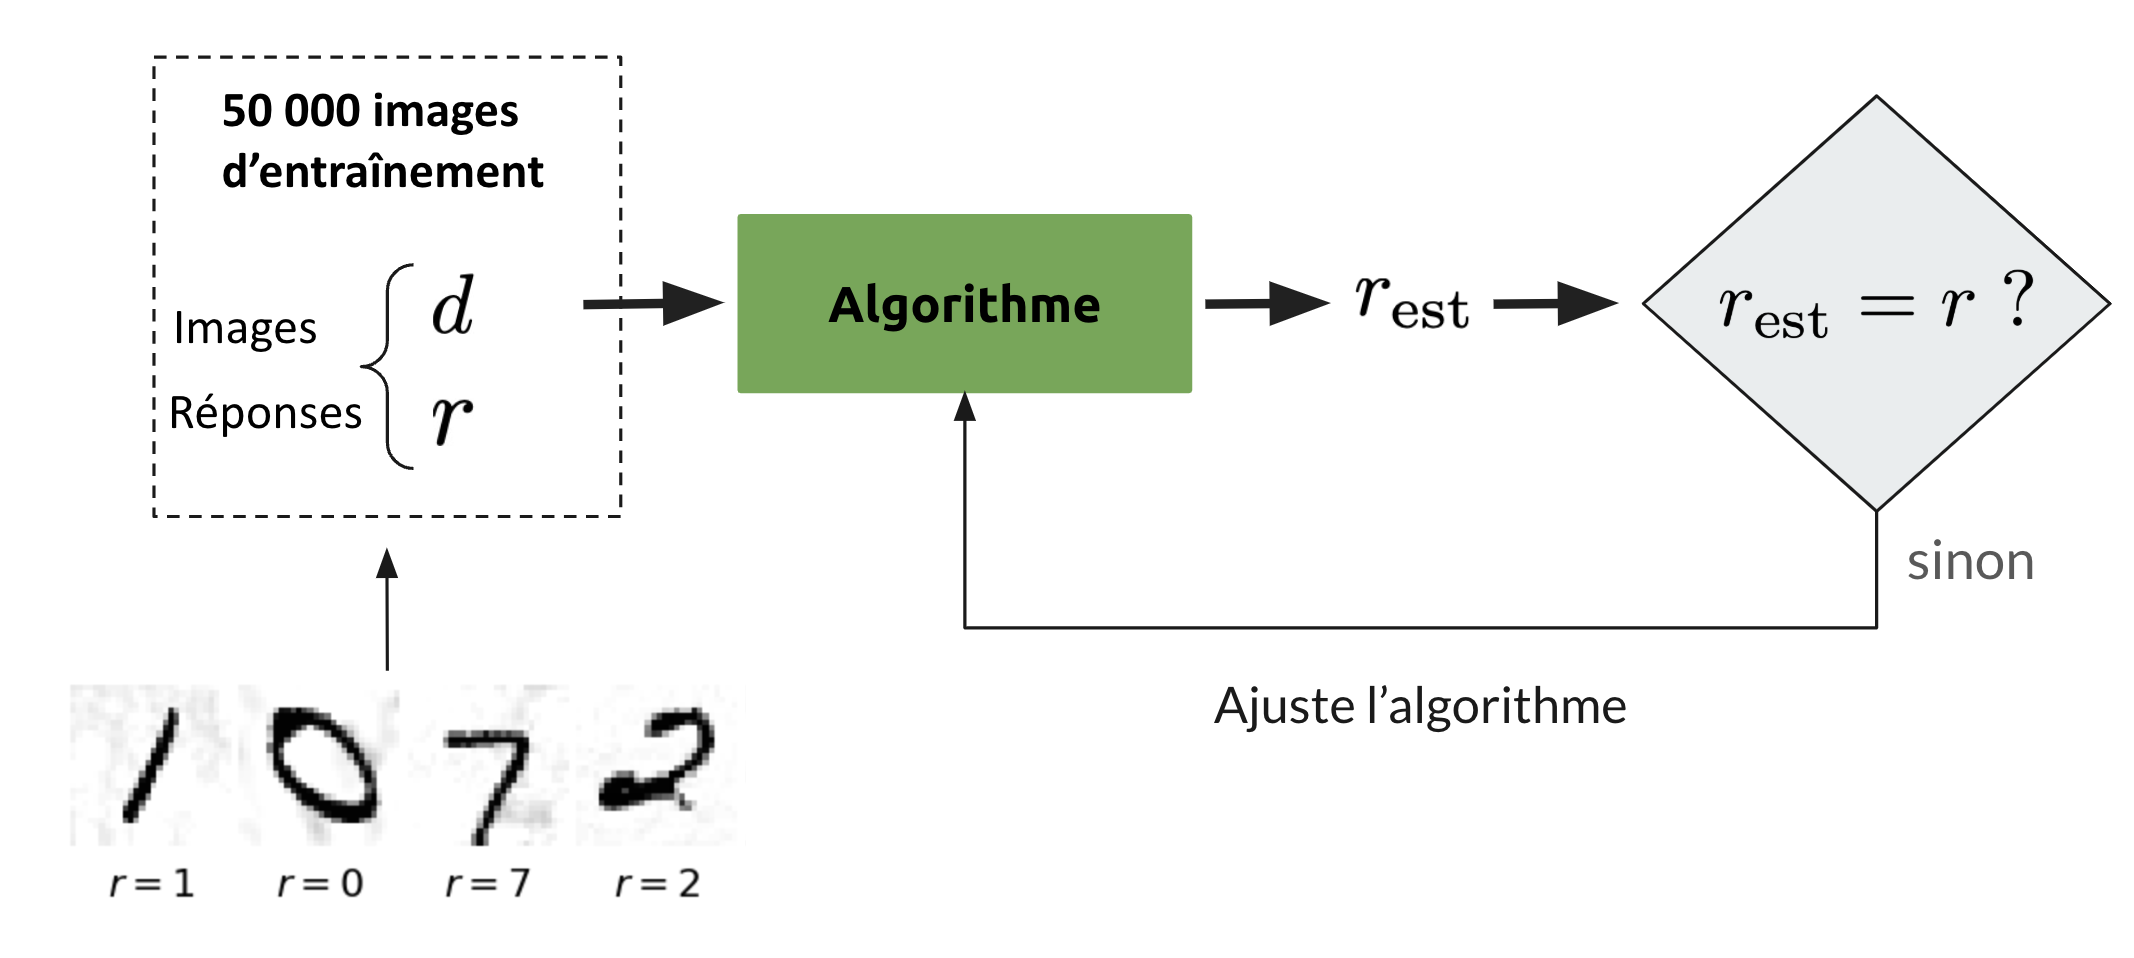  
!!!

!!! tip Les deux étapes de l'algorithme  
La majorité des algorithmes d'IA fonctionnent en **2 étapes**.  
1. **Calcul de caractéristiques** : à partir de l'image, on calcule des nombres qui vont donner des informations utiles pour la classification. On met ces nombre dans une **liste appelée `c`**.  
2. **Classification** : on utilise ces caractéristiques pour estimer le chiffre de l'image.  
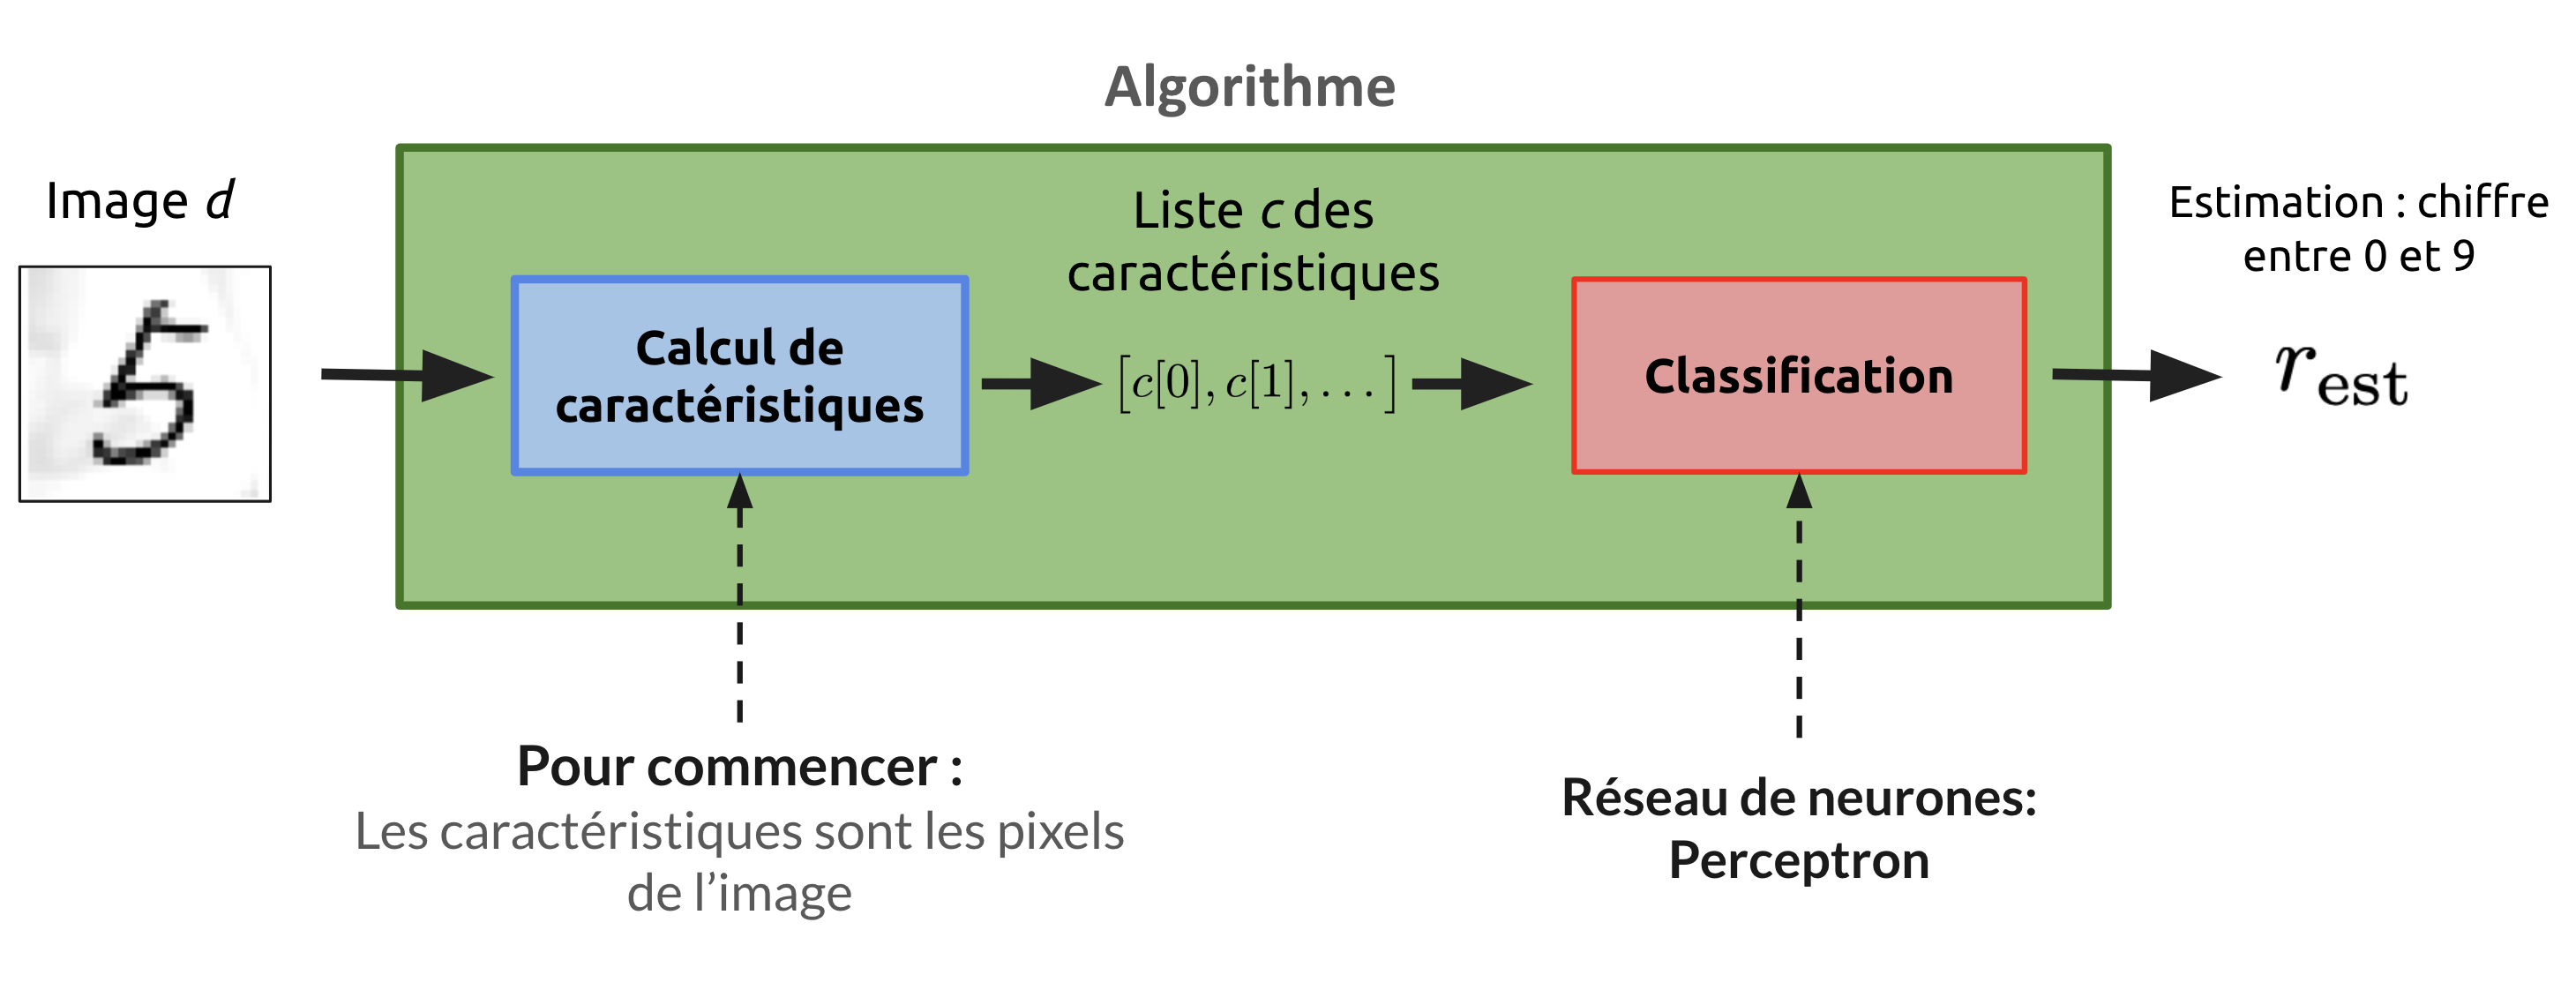  
Pour commencer, nous allons prendre comme caractéristiques les valeurs des pixels de l'image. Passez à la suite pour découvrir comment coder la classification grâce à un réseau de neurones.  
!!!

!!! question Passez à la suite  
Quand vous êtes prêts, passez à la suite **en excécutant la cellule suivante.**  
!!!

In [ ]:
# Pour passer à la suite, excécute cette cellule

# NE PAS TOUCHER CETTE LIGNE
validation_execution_apprentissage()

## Neurones artificiels

!!! tip Qu'est-ce qu'un neurone en IA ?  
Un neurone artificiel est une fonction qui prend en entrée une liste de caractéristiques `c` et renvoie un vote `v`.  
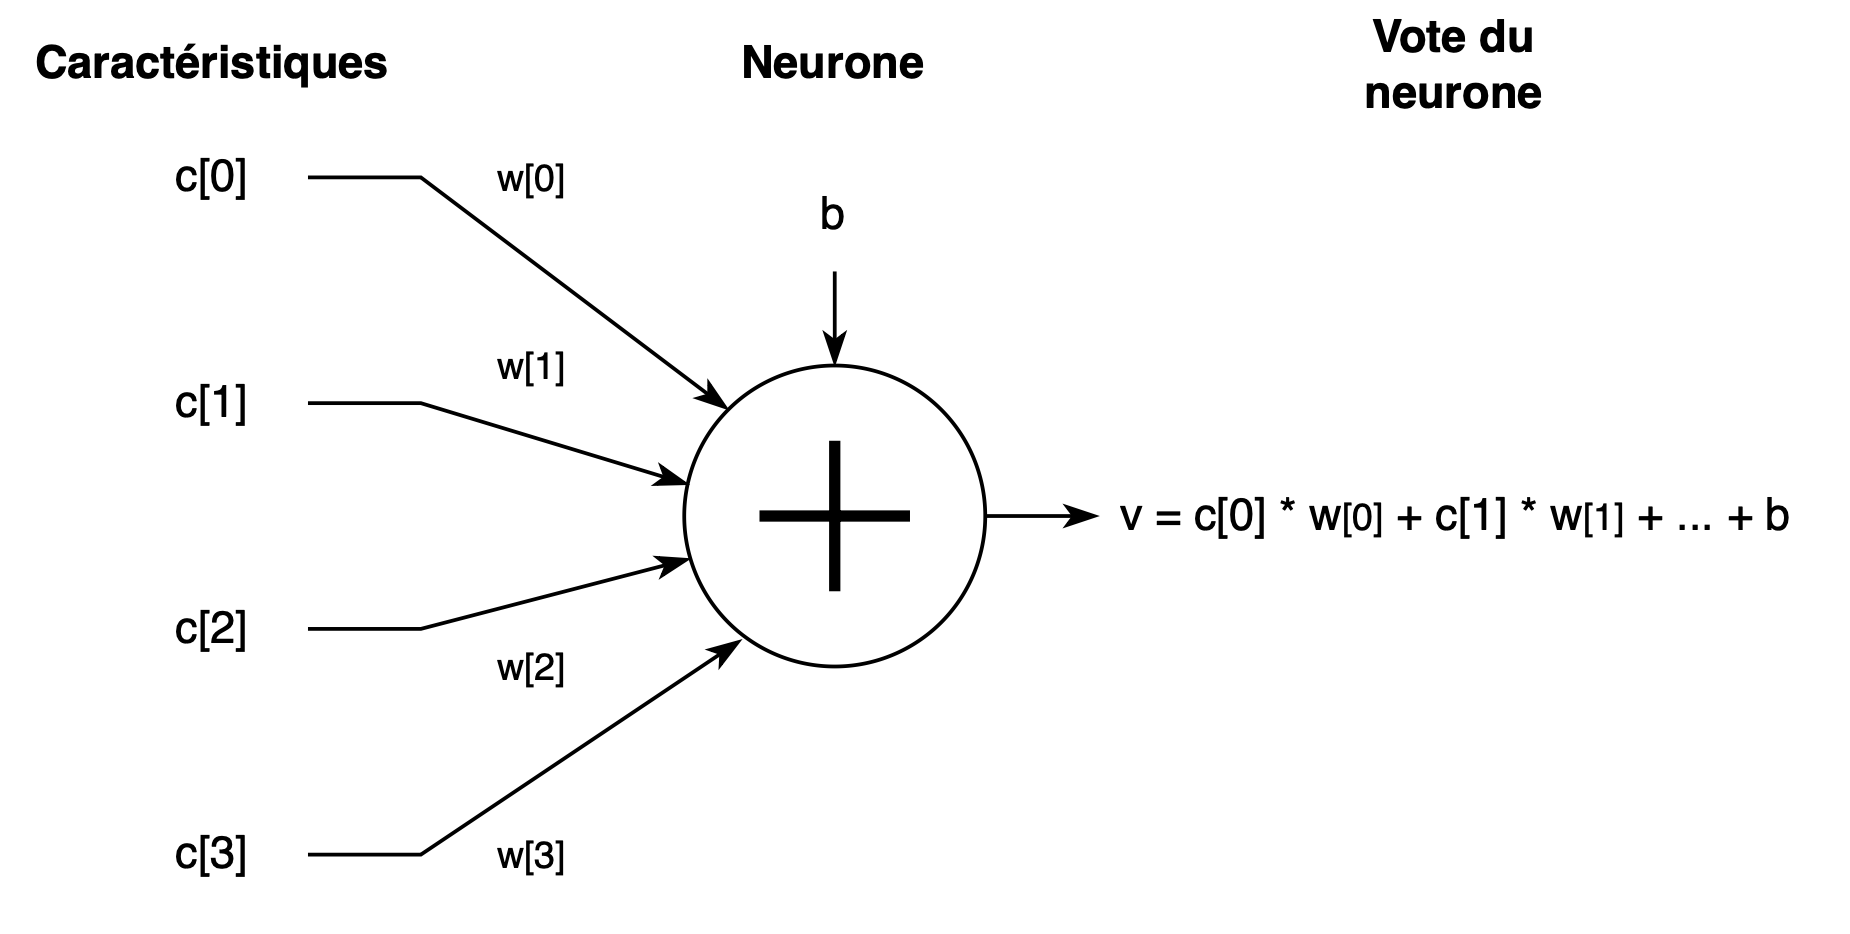  
La vote `v` est la moyenne pondérée des caractéristiques. Les coefficients sont appelés **poids**. `w` est la liste des poids. Chaque neurone a autant de poids que de caractéristiques en entrée, plus **un biais** `b` que l'on ajoute à la fin du calcul.  
!!!
!!! warning Dans cette partie, les caractéristiques sont les pixels de l'image  
Pour commencer, la liste des caractéristiques `c` contient les valeurs des pixels de l'image.  
Vous pourrez plus tard ajouter des caractéristiques supplémentaires pour améliorer votre algorithme.  
!!!
!!! question Quelle sera la valeur de sortie de ce neurone ?  
les caractéristiques vont être les valeurs des pixels : $c = d$. Voici une image d'entrée 2x2 pixels donc 4 caractéristiques et un neurone avec les poids et biais suivants :  
  
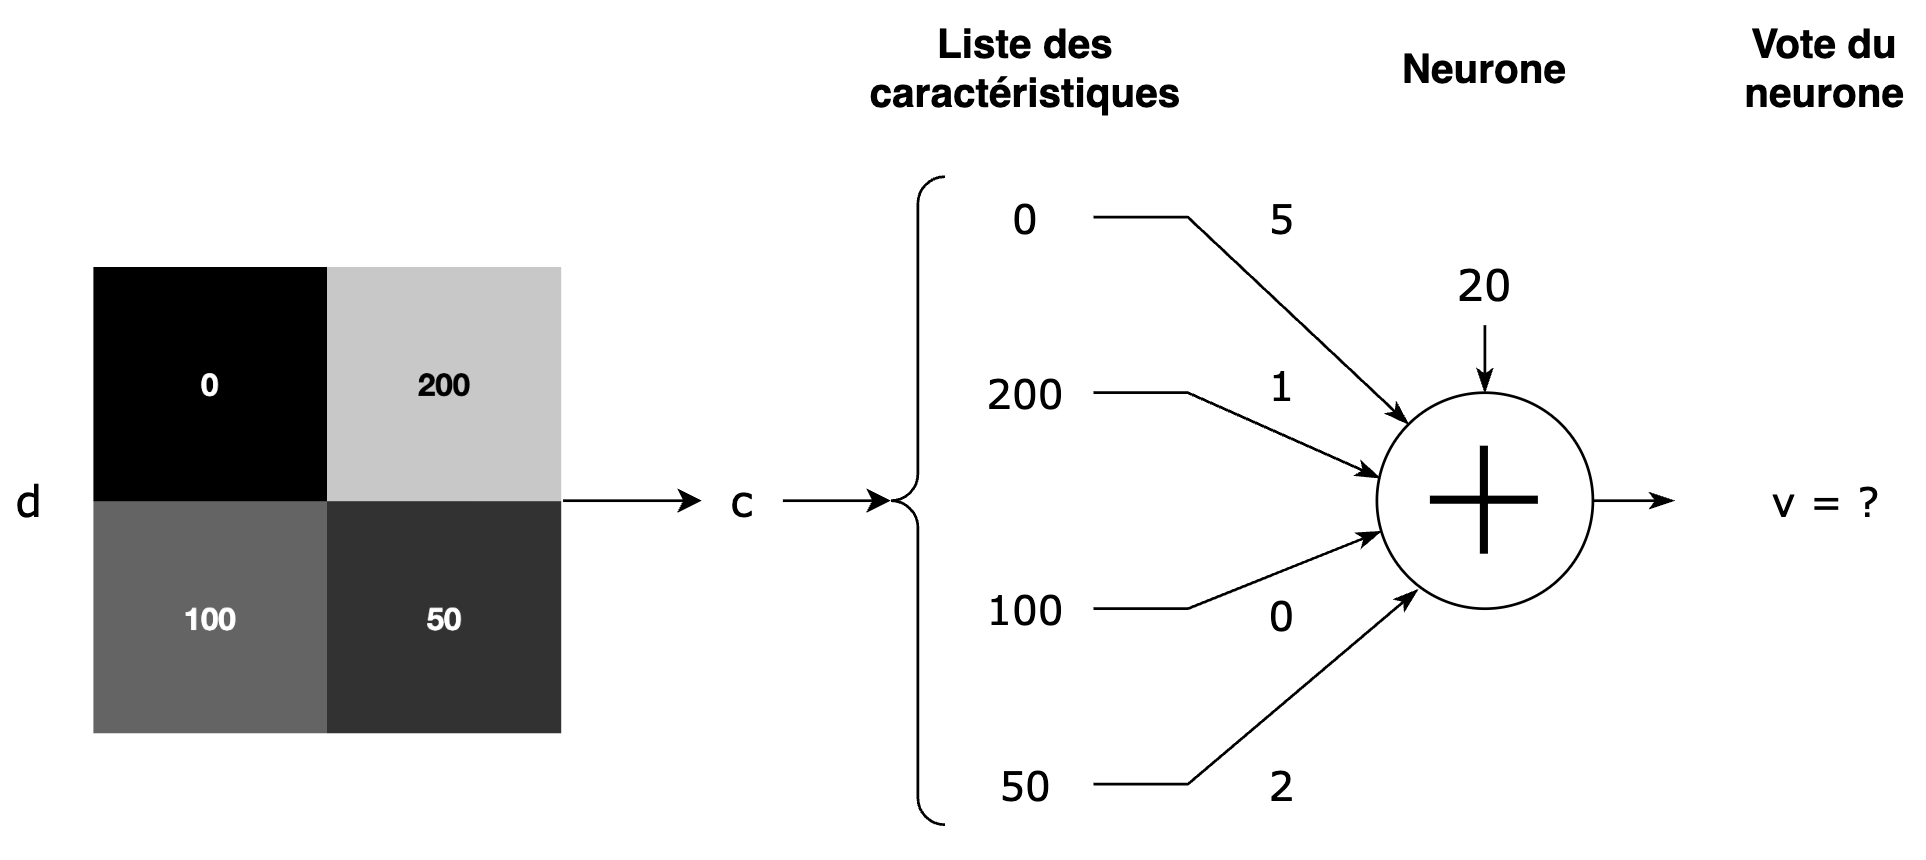  
Remplacez les `...` dans la cellule suivante par le vote `v` du neurone pour cette image puis **exécutez la cellule**.  
!!!

In [ ]:
v = ...

# NE PAS TOUCHER CETTE LIGNE
validation_question_vote_neurone()

!!! question Fonction qui calcule le vote d'un neurone  
Complétez la fonction `vote_neurone` pour qu'elle renvoie le vote `v` du neurone puis exécutez la cellule.  
La fonction `vote_neurone` prend en paramètres d'entrée :  
- `c` : La liste des caractéristiques  
- `w` : Les poids du neurones, une liste de la même taille que la liste c  
- `b` : La valeur du biais du neurone  
!!!

In [ ]:
# Codez la fonction qui calcul le vote d'un neurone

def vote_neurone(c, w, b):
    # c : liste des caractéristiques en entrée du neurone
    # w : liste des poids du neurone
    # b : biais du neurone
    
    l = len(c) # nombre de caractéristiques
    v = 0
    
    for i in range(l): # Pour chaque pixel
        v = v + ... # Ajouter le vote du pixel
    
    # Ajouter à v le biais : 
    v = v + ...
    
    return v



# NE PAS TOUCHER CETTE LIGNE
validation_vote_neurone()

!!! tip Comment un neurone permet de classer des images  
Pour comprendre, regardons un exemple très simple : classer des petites images de taile `3x3` représentant un $0$ et un $1$.  
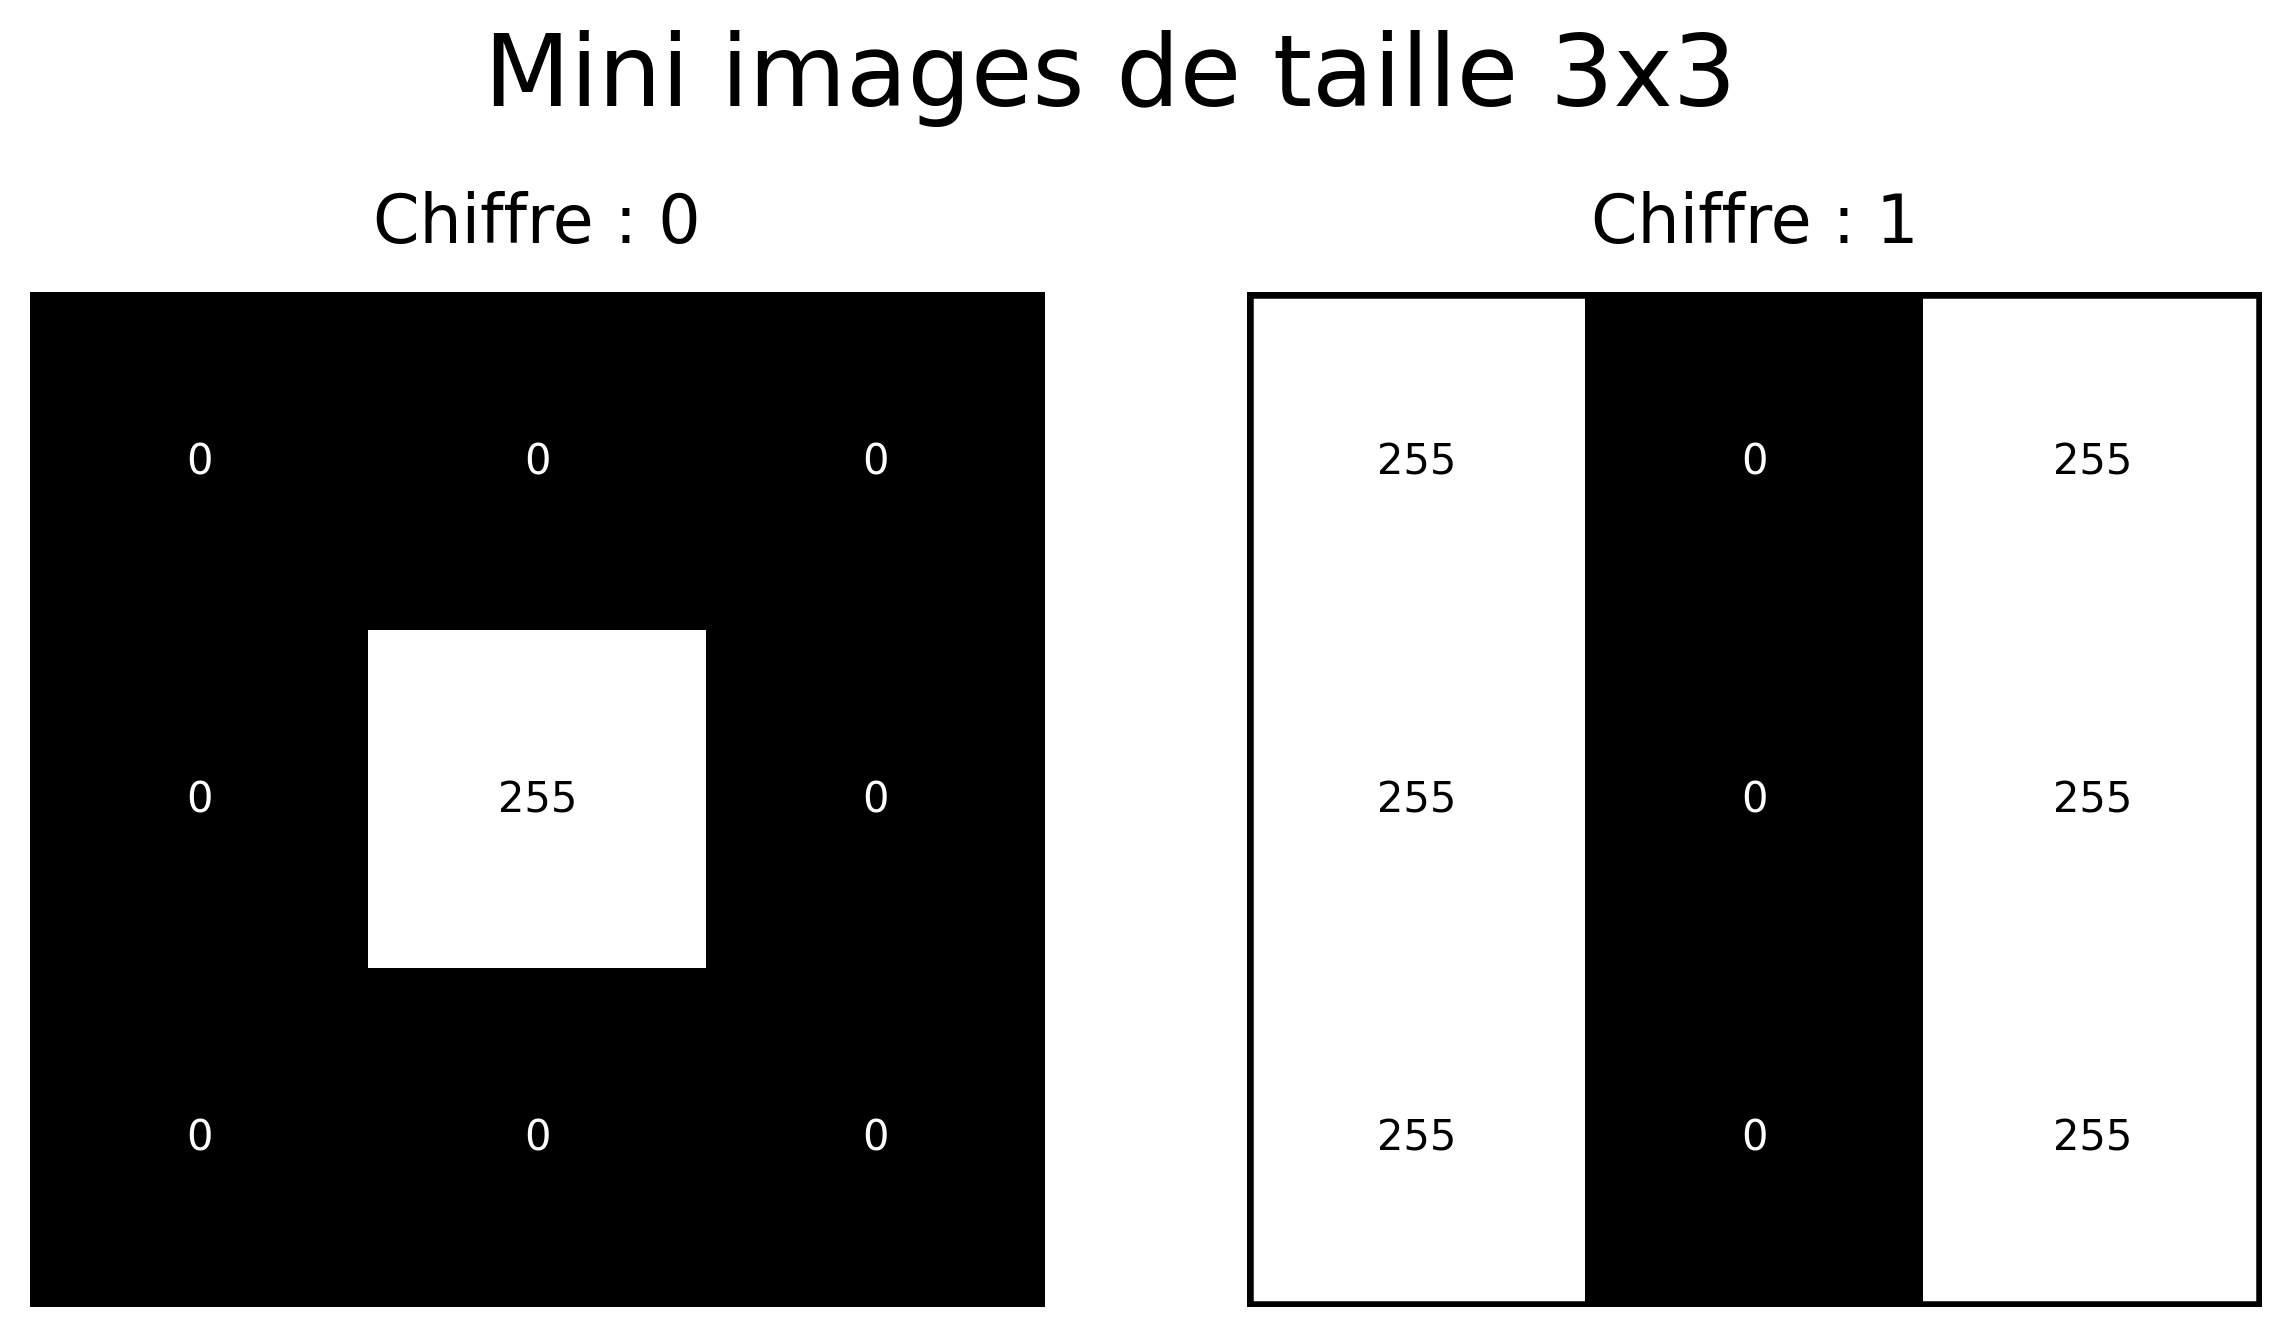  
Pour chaque image, on a $3 \times 3 =9$ pixels, donc $9$ caractéristiques. On va chercher à les distinguer avec **un neurone à $9$ poids et $1$ biais**.  
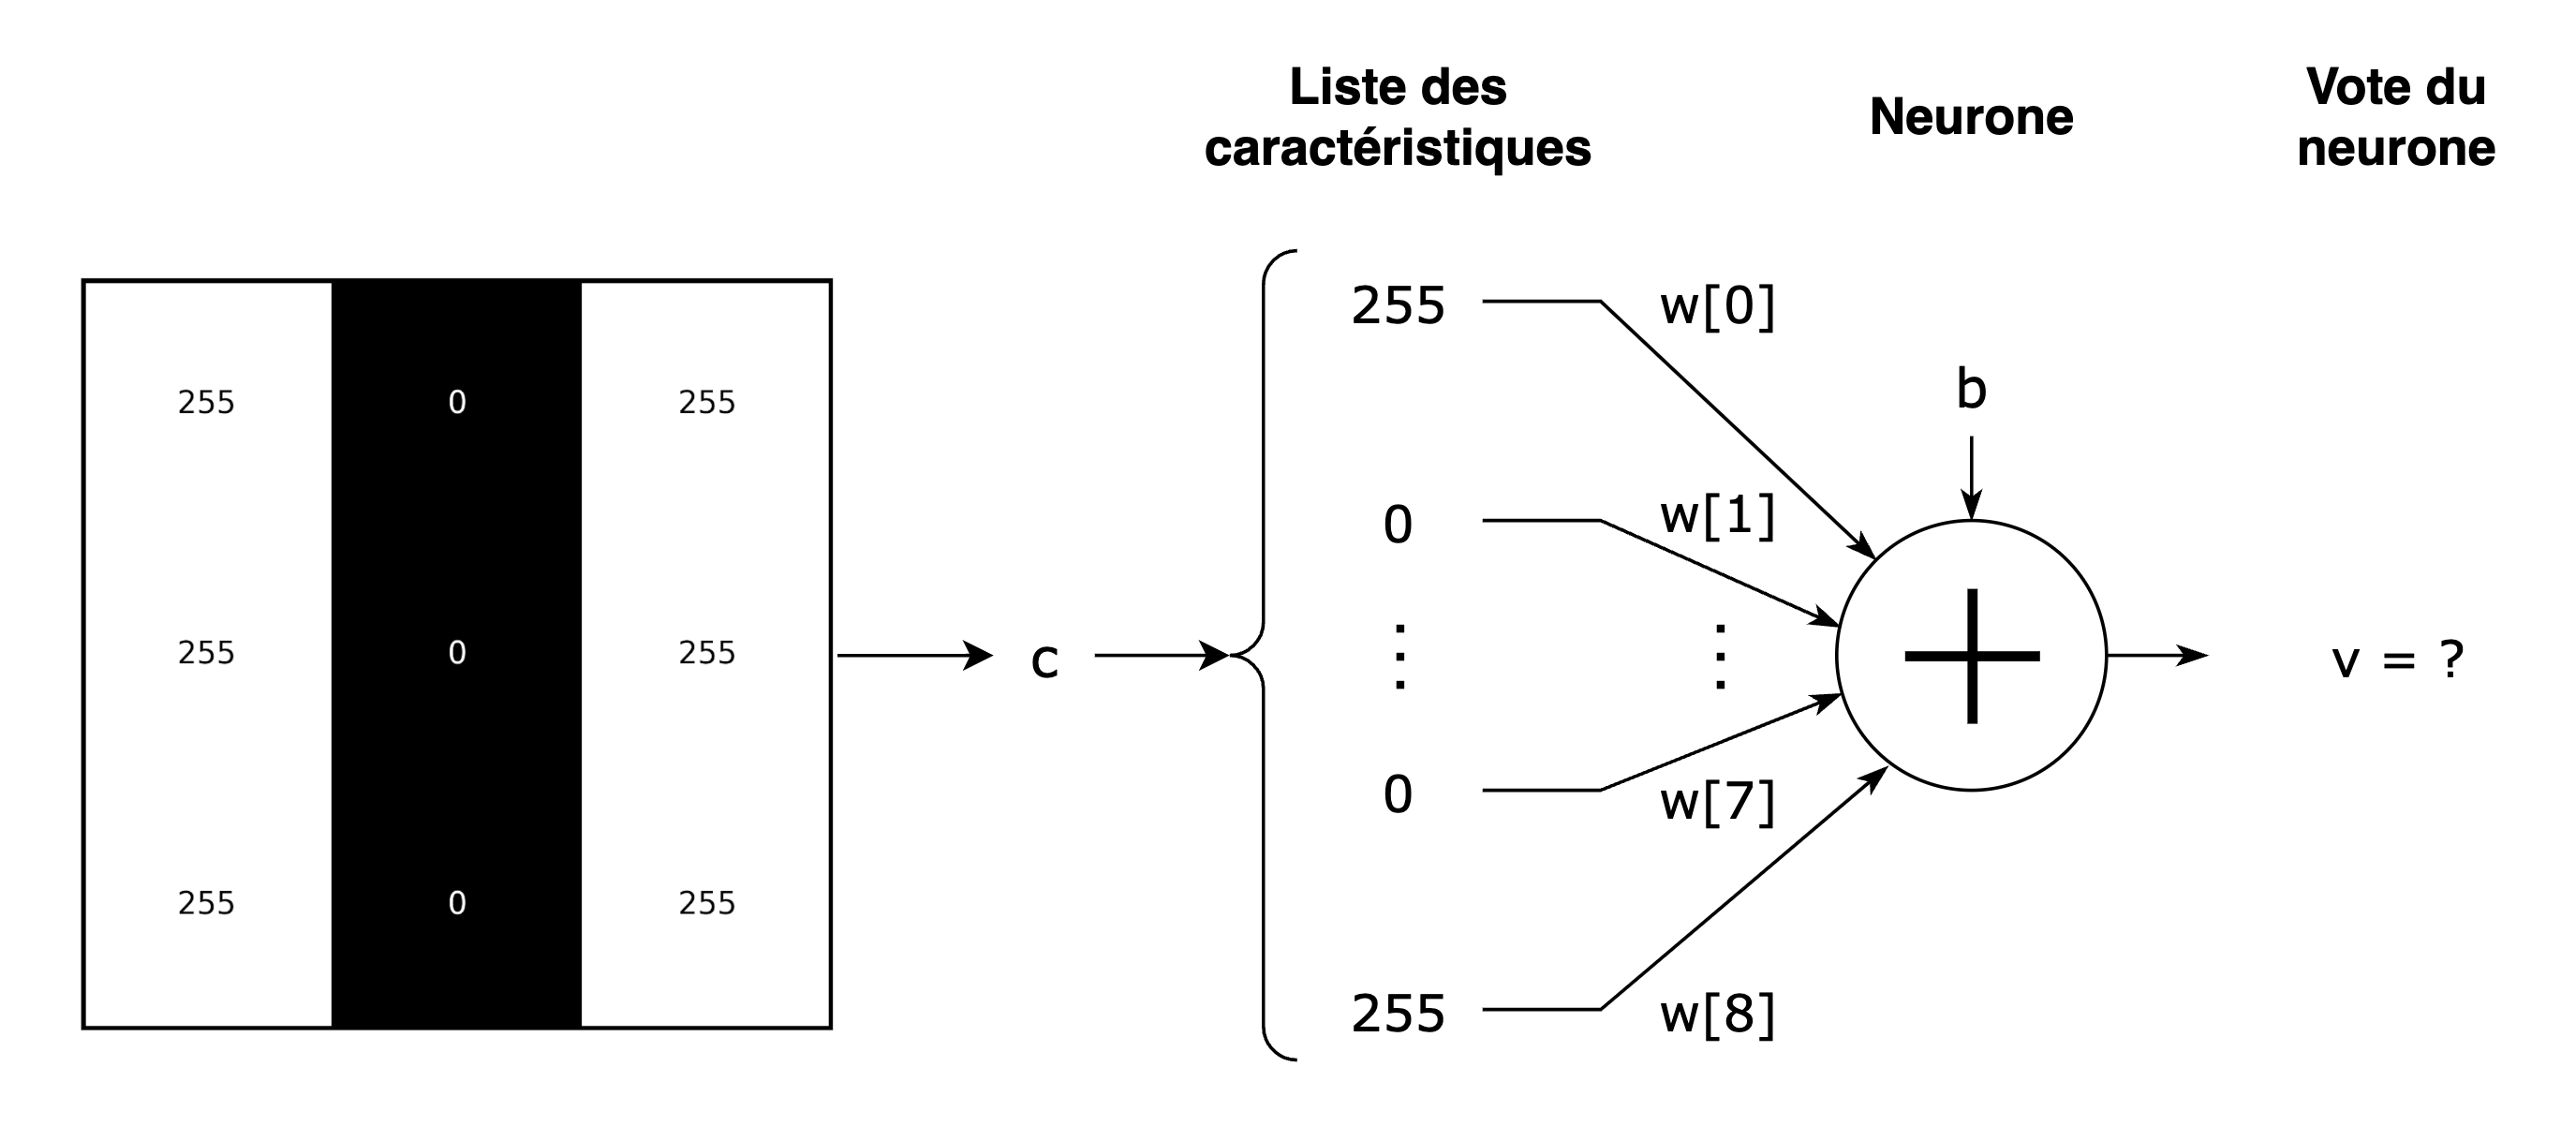  
!!!
!!! question Trouver des poids pour que le vote soit positif pour l'image de 1 et négatif pour l'image de 0  
Modifiez la liste `w` des poids du neurone pour que le vote `v` soit positif pour l'image de 1 et négatif pour l'image de 0.  
!!!

In [ ]:
# Liste des poids À MODIFIER
w = [ 0, -1,  0,
     -1,  1, -1,
      0, -1,  0]

# Biais
b = 0

afficher_poids_et_mini_images(w, b, [d_0, d_1])


# NE PAS TOUCHER CETTE LIGNE
validation_poids_mini_images()

!!! success Bravo vous avez compris comment marche un neurone articifiel !  
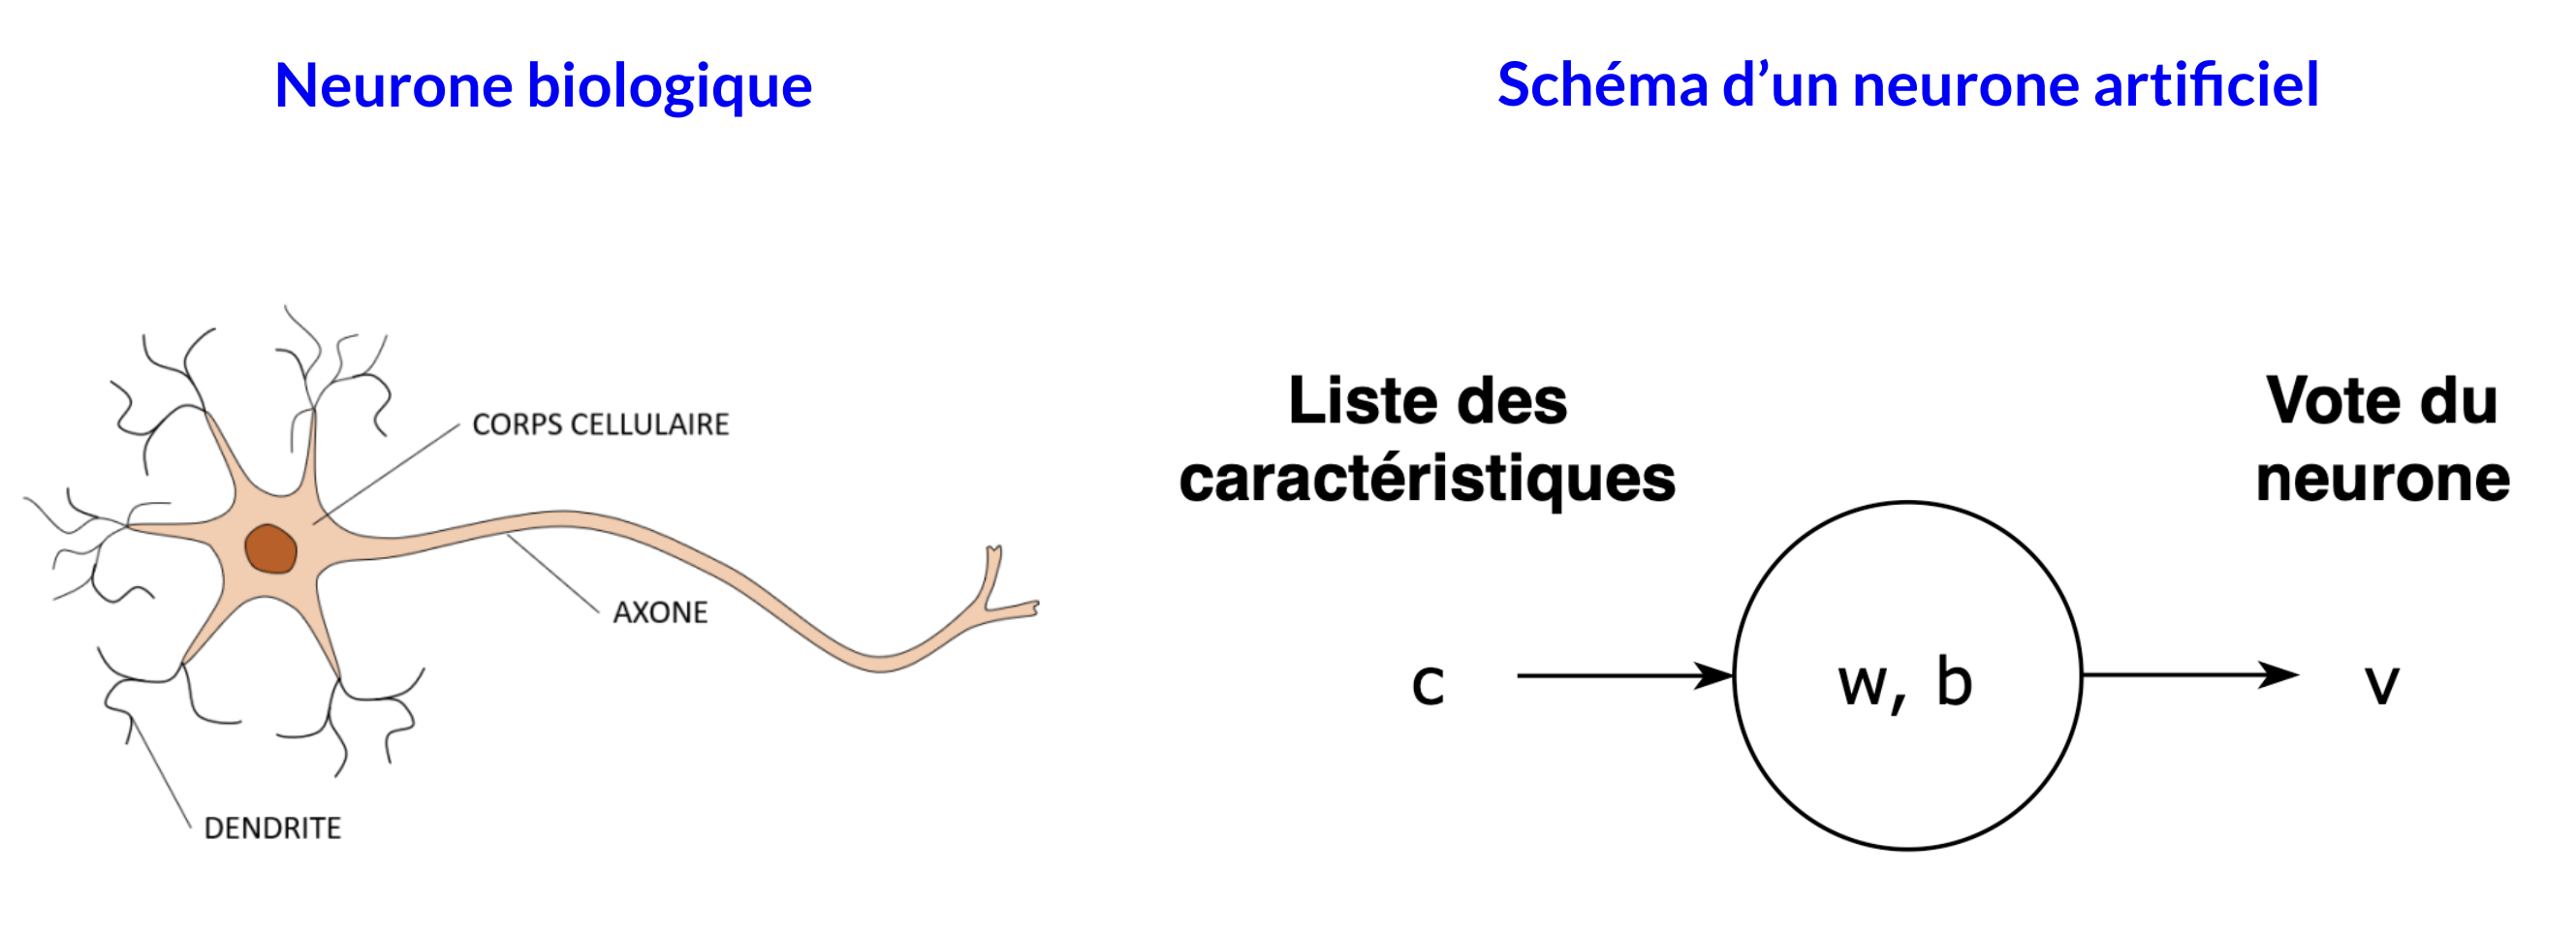  
Revenons maintenant à notre problème de départ : reconnaitre le chiffre écrit sur une image 28x28. Nous allons pour cela construire un réseau de plusieurs neurones.  
!!!

!!! tip Couche de neurones pour reconnaitre 10 classes d'images  
Un réseau de neurones est composé de une ou plusieurs couches ayant chacune plusieurs neurones. Notre réseau aura **une couche de 10 neurones**. Chaque neurone vote pour un chiffre. **L'estimation de notre algorithme sera le chiffre qui aura le plus grand vote.**  
  
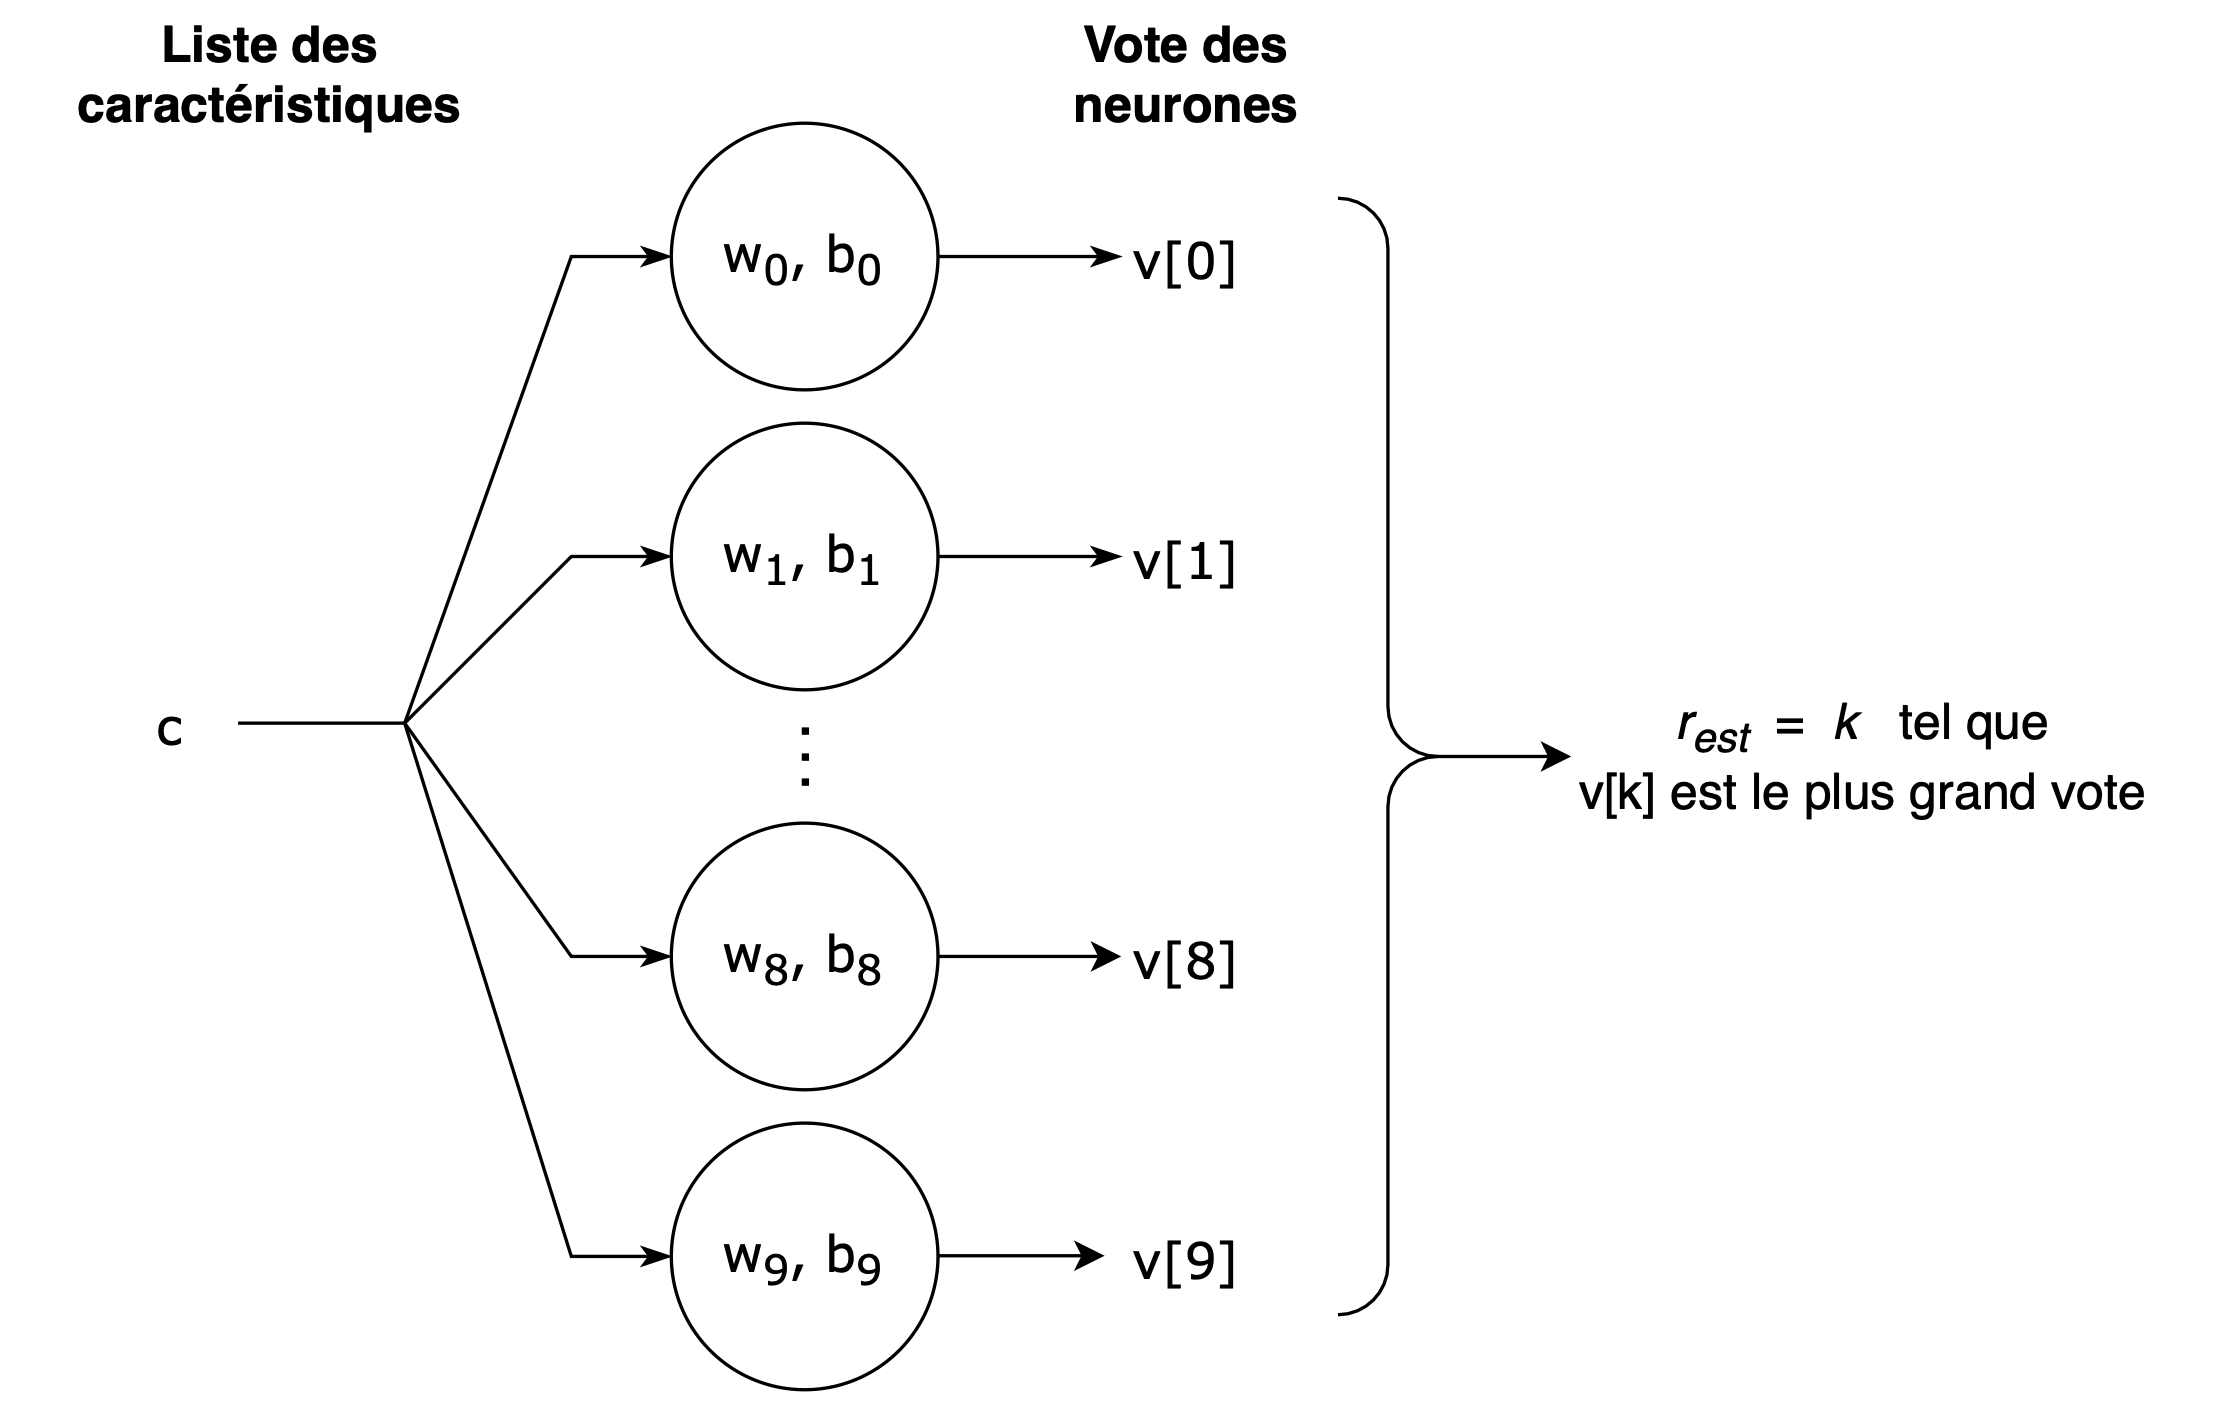  
!!!
!!! question Quelle est l'estimation `r_est` du réseau pour cette image ?  
Quel est le chiffre `r_est` sur cette image **estimé** par le réseau de neurones ?  
  
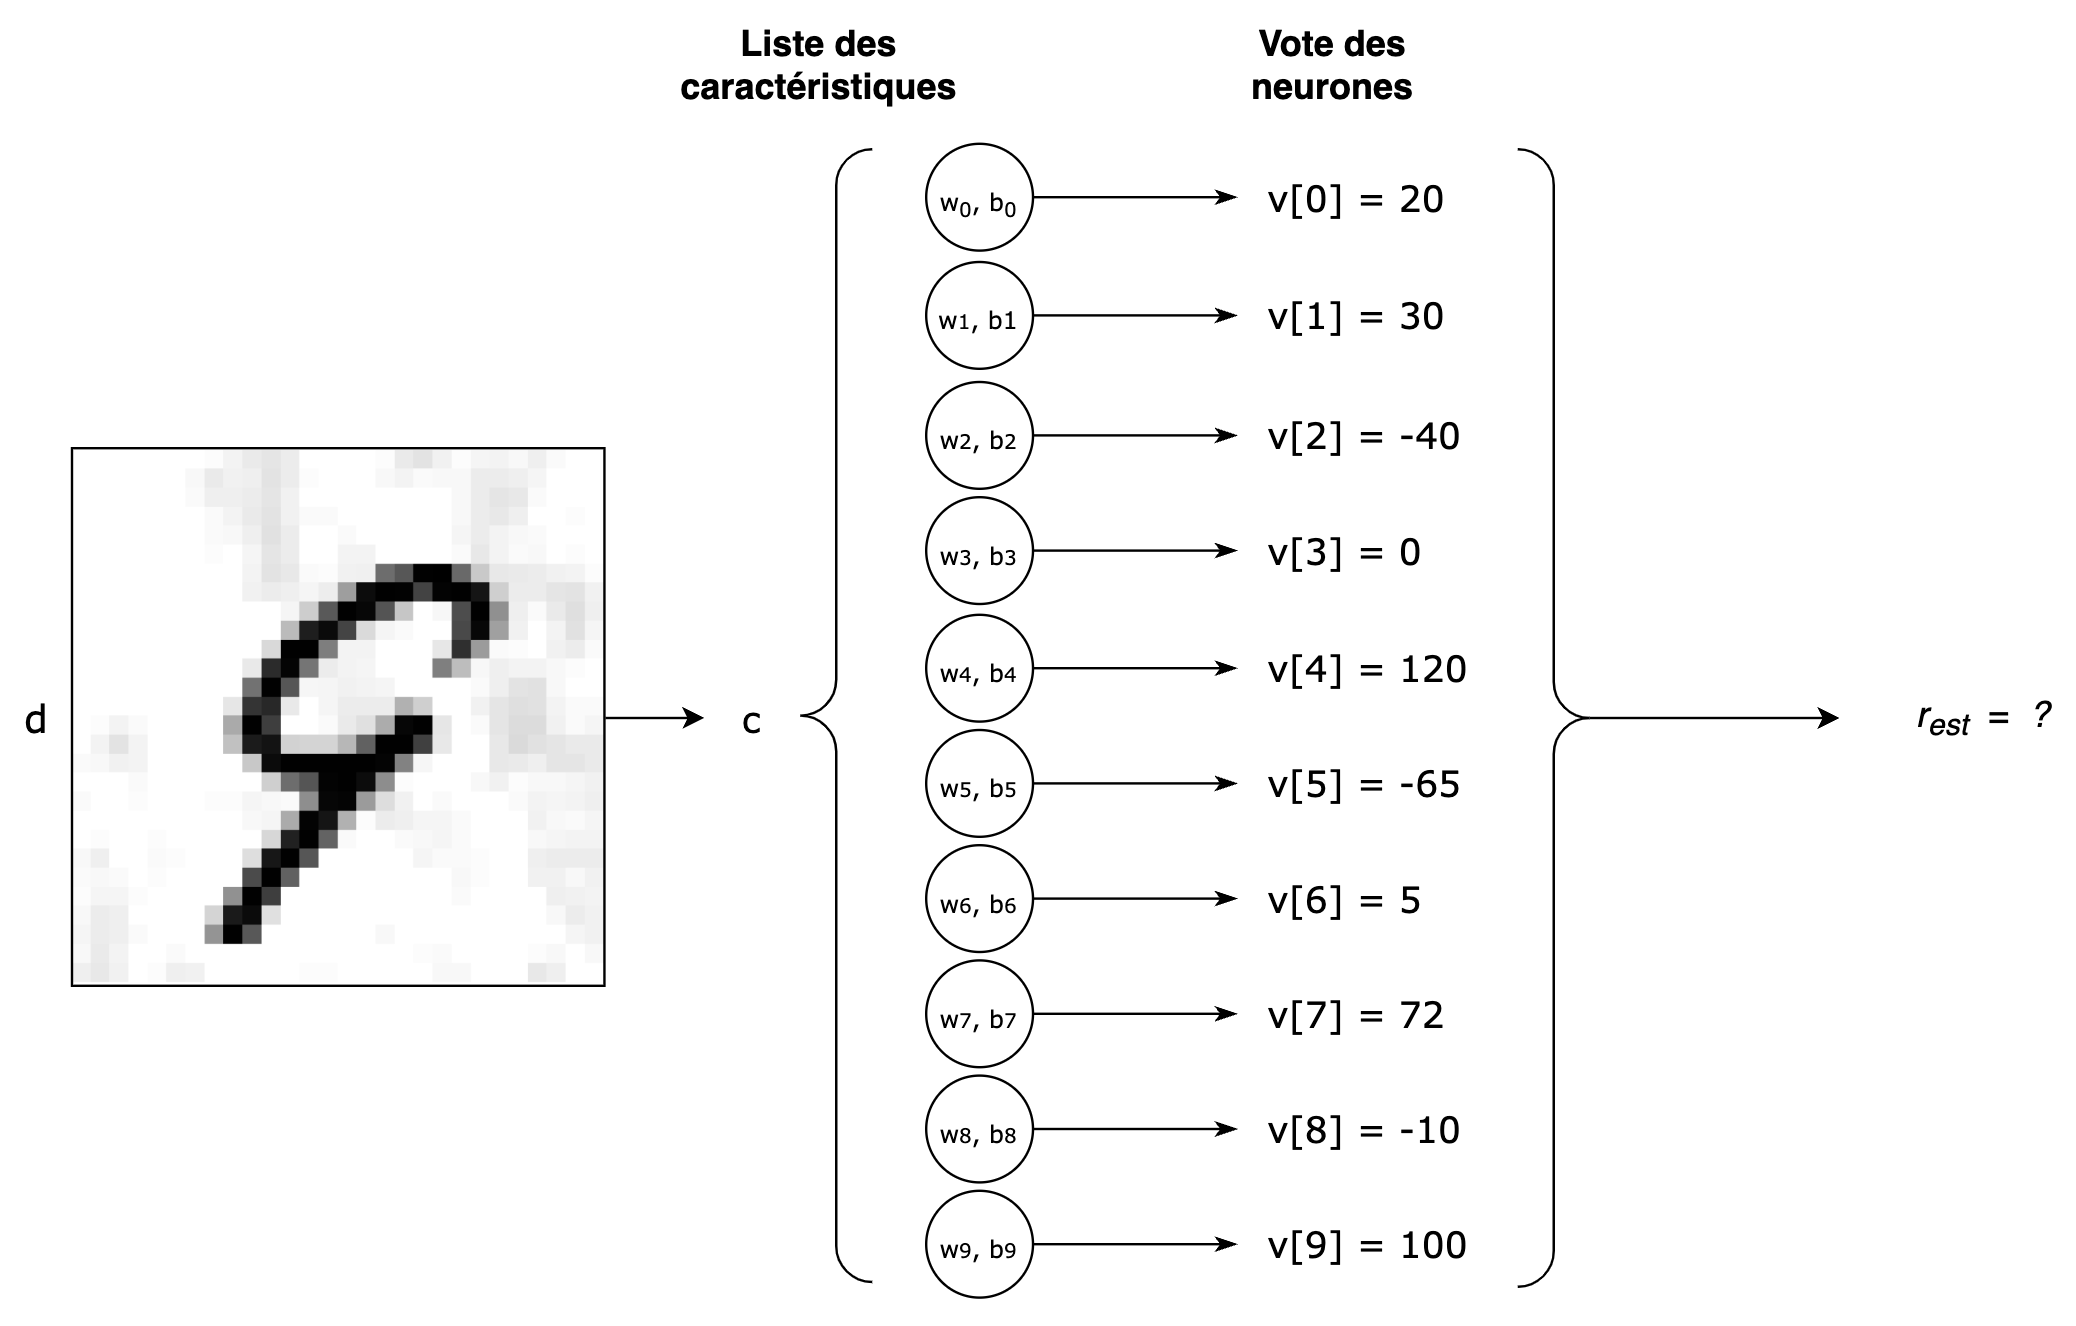  
Regardez la valeur des votes pour chaque neurone et donnez votre réponse dans la cellule suivante.  
!!!

In [ ]:
r_est = ...

# NE PAS TOUCHER CETTE LIGNE
validation_estimation_reseau()

## Implémentation du réseau de neurones

!!! tip Calcul des caractéristiques  
Pour commencer, nous prenons $c = d$ c'est à dire que les caractéristiques sont les valeurs des pixels de l'image `d`.  
**Exécutez la cellule suivante** pour définir la fonction `calculer_caracteristiques`. Elle construit la liste des caractéristiques `c` qui contient tous les pixels de l'image `d`.  
Vous pourrez plus tard modifier cette fonction pour ajouter de nouvelles caractéristiques.  
!!!

In [ ]:
def calculer_caracteristiques(d):
    c = []
    for i in range(len(d)):
        for j in range(len(d[i])):
            c.append(d[i][j])
    
    return c 

validation_execution_calculer_caracteristiques()

!!! tip Calcul des votes de chaque neurone  
Pour chaque image, on calcule le vote de chaque neurone correspondant chacun à un chiffre.  
Complétez la fonction `calcul_votes` pour qu'elle renvoie une liste de 10 valeurs, les votes de chaque neurone. On utilise la fonction `vote_neurone` que vous avez déjà codé.  
La fonction `calcul_votes` prend en paramètres d'entrée :  
- `c` : La liste des caractéristiques de l'image  
- `W` : Les poids de chaque neurones, une liste de 10 valeurs où chaque élément W[k] est la listes des poids `w` du neurone k  
- `B` : Les biais de tous les neurones, une liste de 10 valeurs ou chaque élément est le biais `b` du neurone k  
!!!

In [ ]:
def calcul_votes(c, W, B):
    votes = [] # On initialise en liste vide puis on va ajouter les votes un par un
    
    for i in range(10): # pour chaque neurone
        w = ...
        b = ...
        v = vote_neurone(c, w, b)
        
        votes.append(...)
            
    return votes

# NE PAS TOUCHER CETTE LIGNE
validation_calcul_votes()

!!! tip Estimation finale  
Completer la fonction `estimation` pour qu'elle renvoie le chiffre prédit par le réseau de neurones.  
La fonction `estimation` prend en paramètres d'entrée :  
- `c` : La liste des caractéristiques  
- `W` : Les poids de chaque neurones, une liste de 10 valeurs ou chaque élément W[k] est les poids `w` du neurone k  
- `B` : Les biais de tous les neurones, une liste de 10 valeurs ou chaque élément est le biais `b` du neurone k  
!!!

In [ ]:
def estimation(c, W, B):
    # Récupérer les votes de chaque neurone avec la fonction précédente
    votes = ...
    
    # Plus grand vote
    max_vote = max(votes)
    
    return votes.index(max_vote) # renvoie le chiffre qui a le plus grand vote


# NE PAS TOUCHER CETTE LIGNE
validation_estimation()

## Apprentissage des poids à partir des erreurs

!!! abstract Apprentissage des poids  
Il faut maintenant trouver des poids et des biais qui permettent de faire peu d'erreur de classification. L'idée centrale d'un algorithme d'IA est de **s'améliorer à partir des erreurs** commises sur les données d'entrainement. C'est ce qu'on appelle la phase d'apprentissage.  
L'apprentissage est possible car nous avons beaucoup de données, 30 000 images qui vont servir **d'exemples** à notre réseau de neurones.  
!!!
!!! tip Perceptron  
Le perceptron est un algorithme d'apprentissage qui modifie les poids et biais avec la stratégie suivante :  
1. Pour chaque image, on calcule les votes de chaque neurone. On en déduit l'estimation du chiffre (chiffre avec le plus grand vote).  
2. Si l'estimation est le bon chiffre, on ne change rien.  
3. Si l'estimation du chiffre est fausse, on va modifier les poids selon un paramètre `a`:  
   - On ajoute les valeurs des caractéristiques `c` de l'image au poids `w` du neurone pour le bon chiffre : $w[k] = w[k] + a * c[k]$  
   - On soustrait les valeurs des caractéristiques `c` de l'image au poids `w` du neurone pour le mauvais chiffre qui a été voté : $w[k] = w[k] - a * c[k]$  
   - On ajoute $a$ au biais du bon chiffre  
   - On soustrait $a$ au biais du mauvais chiffre  
4. On répète ces étapes pour chaque image  
!!!

!!! warning On revient à notre problème de départ : classer des image de chiffres 28x28  
Nous avons **10 classes d'images** (les chiffres de 0 à 9), et chaque image est de taille **28x28 pixels**.  
!!!

In [ ]:
# Complétez avec le nombre de classes (égale au nombre de neurones)
nombre_classes = ...

# Complétez avec le nombre de poids de chaque neurone 
# (indice : correspond au nombre de caractéristique de chaque image)
nombre_poids = ...


# NE PAS TOUCHER CES LIGNES
W, B = initialiser_poids(nombre_poids, nombre_classes)
affichage_poids(W)
validation_initialisation_poids()

!!! tip Apprentissage  
Complétez la fonction `apprentissage_perceptron` pour qu'elle renvoie les poids et biais du réseau de neurones issus de l'apprentissage.  
La fonction `apprentissage_perceptron` prend en paramètres d'entrée :  
- `d_train` : La liste des images pour entraîner votre réseau  
- `r_train` : La liste des vraies réponses pour chaque image de `d_train`  
- `a` : Le paramètre d'apprentissage du perceptron  
!!!

In [ ]:
def apprentissage_perceptron(d_train, r_train, a = 1):
    # --- INITIALISATION DES POIDS --- 
    nombre_caracteristiques = len(calculer_caracteristiques(d_train[0]))
    nombre_classes = 10
    
    W, B = initialiser_poids(nombre_caracteristiques, nombre_classes)
    
    # --- APPRENTISSAGE ---
    nombre_images = len(d_train) # nombre d'images d'entrainement
        
    for i in range(nombre_images):
        d = d_train[i]
        c = calculer_caracteristiques(d)
        r = r_train[i] # La vraie réponse
    
        r_est = estimation(c, W, B)
        
        # On regarde si on a mal classé l'image :
        if r_est != r:
            # Poids du neurone pour le bon chiffre
            w_r = W[r]
            
            # Poids du neurone pour le mauvais chiffre estimé
            w_r_est = W[r_est]
            
            for k in range(nombre_caracteristiques): # Boucle sur les poids
                # Mise à jour des poids selon la règle du perceptron : 
                
                w_r[k] = ...
                w_r_est[k] = ...
                
            # Mise à jour des biais
            B[r] = B[r] + a
            B[r_est] = B[r_est] - a

    return W, B


# NE PAS TOUCHER CETTE LIGNE
validation_apprentissage_perceptron()

!!! tip Lancer l'apprentissage  
Pour lancer l'apprentissage, **exécutez la cellule suivante**.  
!!!

In [ ]:
W, B = apprentissage_perceptron(d_train, r_train)

print("visualisation des poids")
affichage_poids(W)
print("biais :", B)

print("calcul du pourcentage d'erreur final sur les images d'entrainement")
calculer_score_reseau(W, B)

validation_lancement_apprentissage()

!!! tip Score de test  
Dans ce challenge, vous serez classé en fonction de votre pourcentage d'erreur sur des images de test, pour lesquelles vous ne connaissez pas la bonne réponse.  
Le pourcentage d'erreur ci-dessus est votre score d'entraînement sur les images que vous avez utilisées pour apprendre les poids et biais de votre réseau de neurones. Exécutez la cellule ci-dessous pour faire votre première soumission dans le classement et voir votre score de test.  
!!!

In [ ]:
soumettre(W, B)

## Ajout de caractéristiques

!!! tip Ajoutez des caractéristiques  
Jusqu'à maintenant les caractéristiques $c$ en entrée des neurones étaient uniquement les pixels de l'image : $c = d$  
Vous pouvez maintenant ajoutez et/ou modifier les caractéristiques données aux neurones pour tenter de diminuer votre pourcentage d'erreur. Note : il y a toujours autant de poids que de caractéristiques en entrée.  
Modifiez la fonction `calculer_caracteristiques` pour ajouter vos caractéristiques. La fonction doit renvoyer la liste `c` des caractéristiques de l'image.  
!!!
!!! tip Exemple de caractéristiques : les contours verticaux  
Par exemple, vous pouvez ajouter les différences absolues de pixel $|$ `pixels[i+1]` - `pixels[i]` $|$ à la liste des caractéristiques. Cela permet de détecter les **contours verticaux de l'image**.  
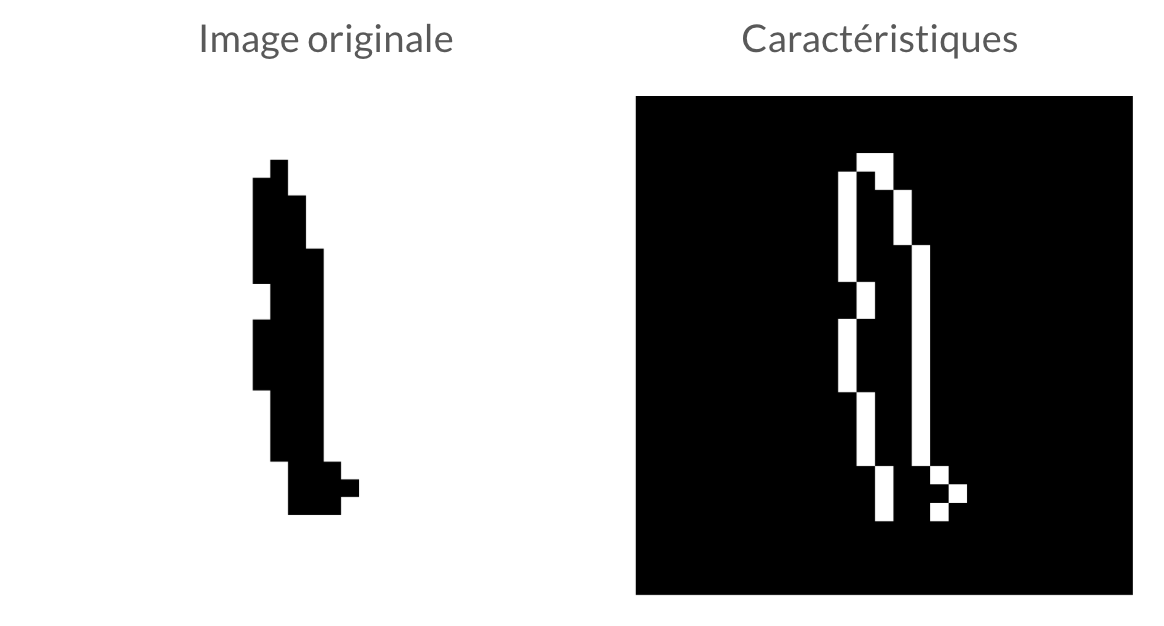  
!!!

!!! question Calculez la liste des pixels d'une image  
Complétez fonction `liste_pixels(d)` pour qu'elle renvoie la liste des 784 pixels de l'image `d`.  
!!!

In [ ]:
# Fonction qui renvoie la liste des 784 pixels d'une image d

def liste_pixels(d):
    pixels = []
    
    for i in range(28):
        for j in range(28):
            pixels.append(...)
            
    return pixels

# NE PAS TOUCHER CETTE LIGNE
validation_liste_pixels()

!!! question Ajoutez à la liste `c` les contours verticaux de l'image  
Complétez la fonction `calculer_caracteristiques` pour ajouter à la liste `c` les contours verticaux de l'image.  
**On les calcule avec :** $|$ `pixels[i+1]` - `pixels[i]` $|$.  
!!!

In [ ]:
def calculer_caracteristiques(d):
    pixels = liste_pixels(d)
    
    # On commence par mettre tous les pixels dans la liste des caractéristiques
    c = pixels
    
    
    # TODO : ajouter à la liste c les contours 
    for i in range(783):
        c.append( ... )

    return c

# NE PAS TOUCHER CETTE LIGNE
validation_calculer_caracteristiques_contours()

!!! tip Lancer l'apprentissage  
Pour lancer l'apprentissage, **exécutez la cellule suivante**.  
!!!

In [ ]:
W, B = apprentissage_perceptron(d_train, r_train)

print("calcul du pourcentage d'erreur final sur les images d'entrainement")
calculer_score_reseau(W, B)

!!! tip Nouvelle soumission  
Pour soumettre votre nouvelle solution, **exécutez la cellule suivante**.  
!!!

In [ ]:
soumettre(W, B)

!!! tip Quartier libre  
Continuez à tester vos caractéristiques en modifiant la fonction `calculer_caracteristiques` et en répétant les étapes d'apprentissage et de soumission test.  
!!!

In [ ]:
def calculer_caracteristiques(d):
    pixels = liste_pixels(d)
    
    # On commence par mettre tous les pixels dans la liste des caractéristiques
    c = pixels
    
    
    # TODO : ajoutez vos caractéristiques !
    ...

    return c

# NE PAS TOUCHER CETTE LIGNE
validation_calculer_caracteristiques_custom()

In [ ]:
W, B = apprentissage_perceptron(d_train, r_train)

print("calcul du pourcentage d'erreur final sur les images d'entrainement")
calculer_score_reseau(W, B)

In [ ]:
soumettre(W, B)

[mathapera](https://soundcloud.com/akimx98/perceptron-ft-ures-slowold?in=akimx98/sets/challenge-flow)